In [1]:
%ls -al

total 200
drwxr-xr-x 1 root root   4096 Jun 13 03:36 ./
drwxr-xr-x 1 root root   4096 Jun 13 03:36 ../
drwxr-xr-x 1 root root   4096 Jun  7 16:07 .config/
-rw-r--r-- 1 root root 188400 Jun 13 03:36 research_paper.txt
drwxr-xr-x 1 root root   4096 May 31 16:17 sample_data/


In [0]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser=English()

In [0]:
def tokenize(text):
  lda_tokens=[]
  tokens=parser(text)
  for token in tokens:
    if token.orth_.isspace():
      continue
    elif token.like_url:
      lda_tokens.append('URL')
    elif token.orth_.startswith('@'):
      lda_tokens.append('SCREEN_NAME')
    else:
      lda_tokens.append(token.lower_)
  return lda_tokens

In [15]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def get_lemma(word):
  lemma=wn.morphy(word)
  if lemma is None:
    return word
  else:
    return lemma
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
  return WordNetLemmatizer().lemmatize(word)

In [8]:
nltk.download('stopwords')
en_stop=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def prepare_text_for_lda(text):
  tokens=tokenize(text)
  tokens=[token for token in tokens if len(token)>4]
  tokens=[token for token in tokens if token not in en_stop]
  tokens=[get_lemma(token) for token in tokens]
  return tokens

In [16]:
import random
text_data=[]
with open('research_paper.txt') as f:
  for line in f:
    tokens =prepare_text_for_lda(line)
    if random.random()>.99:
      print(tokens)
      text_data.append(tokens)

['automatic', 'sanitization', 'social', 'network', 'prevent', 'inference', 'attack']
['proposal', 'blind', 'equalizer', 'using', 'output', 'signal', 'decision', 'device', ',iscas']
['simulation', 'world', 'panel', 'session).,siggraph']
['protocol', 'level', 'performance', 'analysis', 'collision', 'protocol', 'system', ',iscas']
['scalable', 'near', 'neighbor', 'graph', 'construction', 'base', 'greedy', 'filter']
['maximize', 'throughput', 'wireless', 'network', 'finite', 'internal', 'buffer', ',infocom']
['absence', 'isolate', 'node', 'wireless', 'network', 'unreliable', 'links', 'curious', ',infocom']
['resiliency', 'aware', 'management', ',vldb']
['auditguard', 'system', 'database', 'audit', 'retention', 'restriction', ',vldb']
['measurement', 'bacterial', 'activity', 'using', 'array', 'base', 'isfet', 'chemical', 'current', 'conveyor', 'inversion', ',iscas']
['spatiotemporal', 'burstiness', 'terms', ',vldb']
['simple', 'efficient', 'dithering', 'method', 'vector', 'quantizer', 'base

In [17]:
from gensim import corpora
dictionary=corpora.Dictionary(text_data)
corpus=[dictionary.doc2bow(text) for text in text_data]

import pickle
pickle.dump(corpus,open('corpus.pkl','wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [18]:
import gensim
num_topics=5
ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=num_topics,id2word=dictionary,passes=15)
ldamodel.save('model5.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [19]:
topics=ldamodel.print_topics(num_words=4)
for topic in topics:
  print(topics)

[(0, '0.035*"network" + 0.027*",infocom" + 0.026*",iscas" + 0.018*"wireless"'), (1, '0.030*",iscas" + 0.021*"channel" + 0.021*",vldb" + 0.021*"multi"'), (2, '0.034*"location" + 0.024*"model" + 0.024*"aware" + 0.024*",iscas"'), (3, '0.037*",iscas" + 0.025*"using" + 0.025*"base" + 0.025*"system"'), (4, '0.035*",infocom" + 0.013*"maximize" + 0.013*"scalable" + 0.013*"circuit"')]
[(0, '0.035*"network" + 0.027*",infocom" + 0.026*",iscas" + 0.018*"wireless"'), (1, '0.030*",iscas" + 0.021*"channel" + 0.021*",vldb" + 0.021*"multi"'), (2, '0.034*"location" + 0.024*"model" + 0.024*"aware" + 0.024*",iscas"'), (3, '0.037*",iscas" + 0.025*"using" + 0.025*"base" + 0.025*"system"'), (4, '0.035*",infocom" + 0.013*"maximize" + 0.013*"scalable" + 0.013*"circuit"')]
[(0, '0.035*"network" + 0.027*",infocom" + 0.026*",iscas" + 0.018*"wireless"'), (1, '0.030*",iscas" + 0.021*"channel" + 0.021*",vldb" + 0.021*"multi"'), (2, '0.034*"location" + 0.024*"model" + 0.024*"aware" + 0.024*",iscas"'), (3, '0.037*",is

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

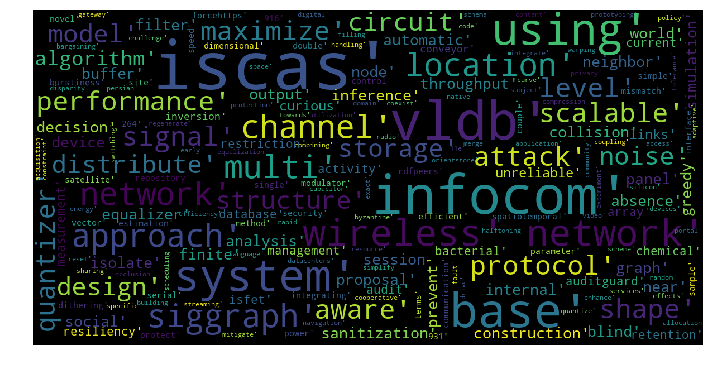

In [25]:
show_wordcloud(text_data)

In [26]:
new_doc='Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc=prepare_text_for_lda(new_doc)
new_doc_bow=dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(168, 1)]
[(0, 0.10368179), (1, 0.59623766), (2, 0.10002627), (3, 0.10002777), (4, 0.100026555)]


In [0]:
ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=3,id2word=dictionary,passes=15)


In [28]:
ldamodel.save('model3.gensim')
topics=ldamodel.print_topics(num_words=4)
for topic in topics:
  print(topic)

(0, '0.023*"system" + 0.023*",vldb" + 0.022*",iscas" + 0.016*"approach"')
(1, '0.031*"network" + 0.026*",infocom" + 0.026*",iscas" + 0.021*"wireless"')
(2, '0.030*"base" + 0.030*",iscas" + 0.023*"location" + 0.016*"using"')


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [29]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [31]:
dictionary=gensim.corpora.Dictionary.load('dictionary.gensim')
corpus=pickle.load(open('corpus.pkl','rb'))
lda=gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display=pyLDAvis.gensim.prepare(lda,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
